# INFO 3350/6350

## Lecture 03: Vectorization and distance metrics

## To do

* Friday sections
  * Be prepared to discuss the readings in depth (Ramsay, Healy, Rambsy)
  * PS1 to be released (due in c. two weeks, Thurs. 9/14, 11:59pm)
* PS0 (shakedown) due tomorrow, 11:59pm
* No lecture next Monday (Labor Day)
* Still on the waitlist? Stick around at the end of class.
* Extra credit for good, consistent answers on Ed
* Study groups are great for homeworks.
* Questions?

## Definitions

* What is a **vector**?
  * An ordered collection of numbers that locate a point in space relative to a shared reference point (called the *origin*).
  * We can also think of vectors as representing the quantified *features* of an object.
  * Vectors are usually written as *row matrices*, or just as lists: $vec = [1.0, 0.5, 3.0, 1.2]$
  * Vectors have as many *dimensions* as there are features of the object to represent.
    * The number of features to represent is a choice of the experiment. There is no correct choice, though some choices are better than others for a given purpose.
* What is **vectorization**?
  * The process of transforming an object into its vector representation, typically by measuring some of the object's properties.
  
## Why would we want to do this?

One goal of humanistic inquiry and of scientific research is to compare objects, so that we can gather them into types and compare any one object to others that we observe. Think of biological species or literary genres or historical eras. But how can we measure the difference or similarity between objects that are, after all, always necessarily individual and unique?

* Measuring the *properties* of objects lets us compare those objects to one another.
  * But ... *which* properties?
  * Example: We might count words by type to compare gender and sentiment in novels.
* Establishing a vector representation allows us to define a **distance metric** between objects that aren't straightforwardly spatial.
  * "Distance" is a metaphor. Ditto "similarity."
  * Nothing is, in itself, like or unlike anything else. 
    * We sometimes seek to assert that objects are similar by erasing aspects of their particularity.
  * Measuring similarity and difference are (always and only) interpretive interventions.
  
## A spatial example

Consider this map of central campus:

![](images/cornell_map.png)

**How far apart are Gates Hall (purple star) and the clock tower (orange star)?**

What do we need to know or define in order to answer this question?

* Where is each building in physical space.
  * Latitude/longitude; meters north/south and east/west of the book store; etc.
* How do we want to measure the distance between them (walking, driving, flying, tunneling, ...). Minutes or miles?

Normal, boring answer: about 0.4 miles on foot via Campus Rd and Ho Plaza, or a bit less if you cut some corners, or less than 0.3 miles if you can fly.

| Clock tower | Gates Hall |
| --- | --- | 
| ![](images/clock_tower.jpg) | ![](images/gates.jpg) |

More interesting version: How far apart are these buildings conceptually? Architecturally? Historically? 

* What are the features and metrics you would use to answer this question?
* This is a lot more like the problem of comparing texts.

## A textual example

In [1]:
text = '''\
My cat likes water.
The dog eats food.
The dog and the cat play together.
A dog and a cat meet another dog and cat.
The end.'''

# Print with sentence numbers
for line in enumerate(text.split('\n')):
    print(line)

(0, 'My cat likes water.')
(1, 'The dog eats food.')
(2, 'The dog and the cat play together.')
(3, 'A dog and a cat meet another dog and cat.')
(4, 'The end.')


Let us stipulate that we want to compare these five sentences according to their "*dogness*" and "*catness*." We care about those two aspects alone, nothing else.

Let's develop some intuitions here:

* Sentences 0 and 1 are as far apart as can be: 0 is about cats, 1 is about dogs.
* Sentence 2 lies between 0 and 1. It contains a mix of dogness and catness.
* Sentence 3 is kind of like sentence 2, but it has twice as much of both dogness and catness.
  * How different are sentences 2 and 3? (There's no objectively correct answer.)
* Sentence 4 is a zero point. It has no dogness or catness.

### Count relevant words

||**cat**|**dog**|
|---|---|---|
|**sentence**| | |
|0|1|0|
|1|0|1|
|2|1|1|
|3|2|2|
|4|0|0|

The **vector representation** of sentence 0 is `[1, 0]`. The vector representation of sentence 3 is `[2, 2]`. And so on ...
### Visualize (scatter plot)

Sketch this by hand ...

### Distance measures

How far apart are sentences 0 and 1 (and all the rest)?

#### Manhattan distance

* Also called "city block" distance. 
* Not much used, but easy to understand and to compute (which matters for very large data sets). 
* Sum of the absolute difference in each dimension.

For **sentences 0 and 1**, the Manhattan distance = |1| + |-1| = 2.

#### Euclidean distance

* Straight-line or "as the crow flies" distance. 
* Widely used in data science, but not always the best choice for textual data.

Recall the Pythagorean theorem for the hypotenuse of a triangle: $a^2 = b^2 + c^2$ or $a = \sqrt{b^2 +c^2}$.

For **sentences 0 and 1**, the Euclidean distance = $\sqrt{1^2 + 1^2} = \sqrt{2} = 1.414$.

OK, but what about the Euclidean distance between **sentence 0 and sentence 3**? Well, that distance = $\sqrt{1^2 + 2^2} = \sqrt{5} = 2.24$.

And between **sentences 2 and 3** (both balanced 50:50 between dogs and cats)? That's 1.4 again, the same as the distance between sentences 0 and 1 (which, recall, are totally divergent in dog/cat content).

An obvious improvement in this case would be to **normalize word counts by document length**.

#### Cosine distance

Maybe instead of distance, we could measure the difference in **direction** from the origin between points.

* **Sentences 0 and 1** are 90 degrees apart.
* **Sentences 2 and 3** are 0 degrees apart.
* **Sentences 0 and 1** are each 45 degrees away from **sentences 2 and 3**.

Now, recall the values of the **cosine** of an angle between 0 and 90 degrees. (Sketch by hand)

So, the cosines of the angles between sentences are:

sentences|angle|cosine
---|---|---
0 and 1|90|0
2 and 3|0|1
0 and 2|45|0.707
0 and 3|45|0.707
1 and 2|45|0.707

We could then transform these cosine **similarities** into **distances** by subtracting them from 1, so that the most *dissimilar* sentences (like 0 and 1) have the greatest distance between them.

The big advantage here is that we don't need to worry about getting length normalization right. Cosine distance is often a good choice for text similarity tasks.

#### Higher dimensions

All of these metrics can be calculated in arbitrarily many dimensions. Which is good, because textual data is often very high-dimensional. Imagine counting the occurrences of each word type in a large corpus of novels or historical documents. Can easily be tens of thousands of dimensions.

## In the real world

* There's nothing wrong with any of these vectorizations and distance metrics, exactly, but they're not state of the art.
* If you've done some recent NLP work, you'll know that, at the very least, you'd want to use static word embeddings in place of raw tokens.
  * This allows you to capture the similarity of meaning between, e.g., "cat" and "kitten."
  * Word counts alone represent any two distinct word types as (entirely) separate dimensions, so "cat" and "kitten" have the same inherent relationship (none) as "cat" and "dog" or "cat" and "algebraic".
* If you were especially ambitious, you'd be looking at something like BERT or ELMo or GPT-*, etc.
    * These transformer-based methods allow for *contextual* embeddings, that is, they represent a word token differently depending on the context in which it appears, so that the representation of "bank" in "my money is in the bank" is different from the the representation of "bank" in "we walked along the bank of the river."
* We'll cover both static and contextual embeddings later this semester.
* And then you might want features that correspond to aspects of a text other than the specific words it contains.
    * When was it written?
    * By *whom* was it written?
    * How long is it?
    * In what style is it written?
    * Who read it?
    * How much did it cost?
    * How many people read or reviewed it?
    * What else did its readers also read?
    * And so on ...

Here, though, we're trying to grasp the *idea* behind document similarity, on which all of these methods depend: transform text into a numeric representation of its features (often, a representation of its content or meaning), then quantify the difference or similarity between those numeric representations.

## In the problem set world

We'll dig into how, as a practical matter, we can vectorize texts and calclulate distance metrics in this week's problem set.

We'll use `scikit-learn` to implement vectorization and distance metrics. The `scikit-learn` API almost always involves *three* steps:

1. Instantiate a learning object (such as a vectorizer, regressor, classifier, etc.). This is the object that will hold the parameters of your fitted model.
1. Call the instantiated learning object's `.fit()` method, passing in your data. This allows the model to learn the optimal parameters from your data.
1. Call the fitted model's `.transform()` or `.predict()` method, passing in either the same data from the `fit` step or new data. This step uses the fitted model to generate outputs given the input data you supply.

For example:

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# get example text as one doc per line
docs = [sent for sent in text.split('\n')]

# instantiate vectorizer object
#  note setup options
vectorizer = CountVectorizer(
    vocabulary=['cat', 'dog']
)

# fit to data
vectorizer.fit(docs)

# transform docs to features
features = vectorizer.transform(docs)

# print output feature matrix
print(vectorizer.get_feature_names_out())
print(features.toarray())

['cat' 'dog']
[[1 0]
 [0 1]
 [1 1]
 [2 2]
 [0 0]]


In [3]:
# calculate distances
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
import numpy as np

print("Euclidean distances")
print(np.round(euclidean_distances(features),2))

print("\nCosine distances")
print(np.round(cosine_distances(features),2))

print("\nCosine **similarities**")
print(np.round(cosine_similarity(features),2))

Euclidean distances
[[0.   1.41 1.   2.24 1.  ]
 [1.41 0.   1.   2.24 1.  ]
 [1.   1.   0.   1.41 1.41]
 [2.24 2.24 1.41 0.   2.83]
 [1.   1.   1.41 2.83 0.  ]]

Cosine distances
[[0.   1.   0.29 0.29 1.  ]
 [1.   0.   0.29 0.29 1.  ]
 [0.29 0.29 0.   0.   1.  ]
 [0.29 0.29 0.   0.   1.  ]
 [1.   1.   1.   1.   0.  ]]

Cosine **similarities**
[[1.   0.   0.71 0.71 0.  ]
 [0.   1.   0.71 0.71 0.  ]
 [0.71 0.71 1.   1.   0.  ]
 [0.71 0.71 1.   1.   0.  ]
 [0.   0.   0.   0.   0.  ]]


Euclidean distances


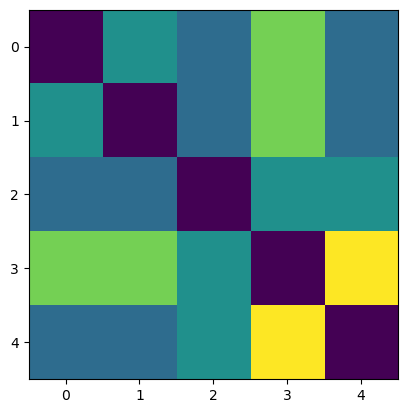

In [4]:
# FYI, two heatmap visualizations
import matplotlib.pyplot as plt
import seaborn as sns

print("Euclidean distances")

# quick and dirty
plt.imshow(euclidean_distances(features))
plt.show()

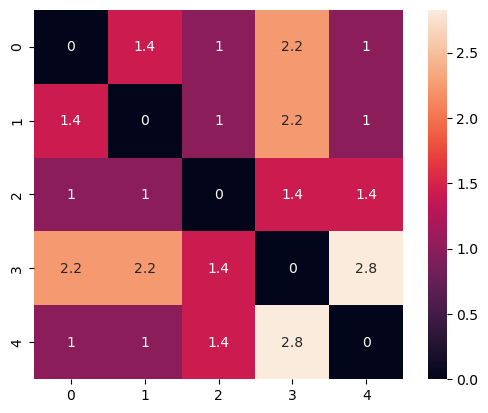

In [5]:
# prettier
sns.heatmap(
    euclidean_distances(features),
    annot=True,
    square=True
)
plt.show()